# Logistic Regression


Our Hypothesis:

\begin{equation}
\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
\end{equation}

\begin{equation}
z = ax+by+c
\end{equation}
Final hypothesis:

\begin{equation}
h_\theta(X) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(ax+by+c)} }
\end{equation}

Loss function for N sample:

\begin{equation}
BCEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(-y_i*\log{\hat{y}_i}-(1-y_i)*\log({1-\hat{y}_i}))
\end{equation}


Loss function for single sample:

<!-- \begin{equation}
L(label,pred) = -label*\log({pred})-(1-label)*\log({1-pred})
\end{equation} 
 -->

\begin{equation}
L(label,pred) = -label*\log({\sigma(z)})-(1-label)*\log({1-\sigma(z)})
\end{equation} 

***
### Update weights

\begin{equation}
w_{i} = w_i- lr* \frac{\partial L}{\partial w_i}
\end{equation}

\begin{equation}
 \frac{\partial L}{\partial w_i} = (\hat{y_i} - y_i)*x_i
\end{equation}



In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from PIL import Image as im 
import os 
from matplotlib import rc 
from matplotlib.animation import FuncAnimation as animate 
rc('animation',html='html5')


In [2]:
dataset = []
classes = os.listdir('dataset')
classes

['0', '1']

In [3]:
for Class in classes: 
    for image in os.listdir(f'dataset/{Class}/'):
        image = im.open(f'dataset/{Class}/{image}')
        imgarr = np.asarray(image)
        feature1 = np.sum(imgarr)/784
        feature2 = np.sum(imgarr - imgarr.T)/784 
        dataset.append([feature1,feature2,int(Class)])

dataset = np.array(dataset)
dataset,dataset.shape

(array([[45.19515306, 26.44897959,  0.        ],
        [47.13265306, 42.44897959,  0.        ],
        [43.20663265, 35.91836735,  0.        ],
        [48.11607143, 37.87755102,  0.        ],
        [46.56505102, 34.28571429,  0.        ],
        [47.53316327, 33.95918367,  0.        ],
        [58.09056122, 39.83673469,  0.        ],
        [53.43367347, 25.79591837,  0.        ],
        [58.98596939, 46.04081633,  0.        ],
        [31.52040816, 24.81632653,  0.        ],
        [53.91964286, 42.12244898,  0.        ],
        [43.4119898 , 36.89795918,  0.        ],
        [14.82397959, 21.2244898 ,  1.        ],
        [21.14413265, 21.87755102,  1.        ],
        [28.02040816, 37.87755102,  1.        ],
        [21.85586735, 23.83673469,  1.        ],
        [17.46811224, 22.85714286,  1.        ],
        [21.47704082, 24.16326531,  1.        ],
        [22.50765306, 26.44897959,  1.        ],
        [19.40561224, 25.79591837,  1.        ],
        [28.17346939

In [8]:
dataset[:,2].dtype

dtype('float64')

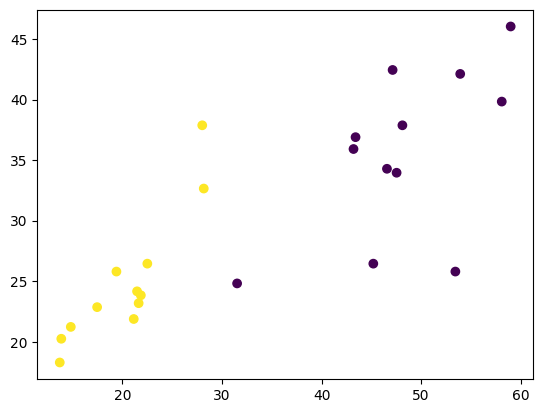

In [4]:
plt.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])

In [5]:
class LogisticRegression:
    def __init__(self,n_features=2) -> None:
        self.Ws = np.random.rand(n_features+1,1)

    def forward(self,x):
        def sigmoid(z):
            return 1/(1+np.exp(-z))
        return sigmoid(self.Ws.T.dot(x))

    def update_grads(self,x,Y,lr=0.01):
        x = np.append(x,[1])
        # print(x.shape)
        x = x.reshape((len(x),1))        
        # print(x.shape)
        # print(x)
        self.Ws -=  lr*(self.forward(x)-Y)*x 
        

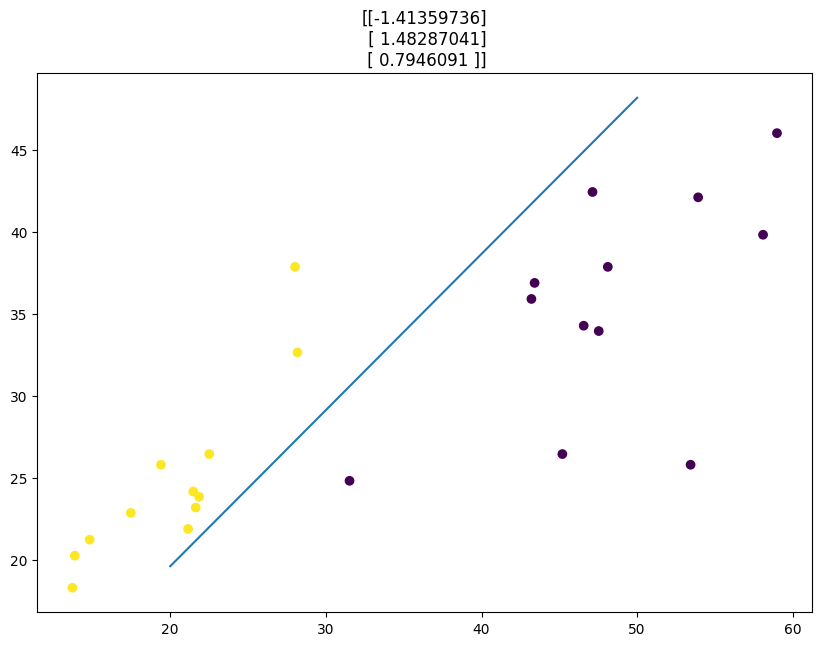

In [6]:
model = LogisticRegression()

fig , ax = plt.subplots(figsize = (10,7))

def train(_):
    f = lambda x: -(model.Ws[0]*x-model.Ws[-1])/model.Ws[1]
    x_ = np.array([20,50])

    for x,y in zip(dataset[:,:2],dataset[:,2]):
        model.update_grads(x,y)

        ax.clear()
        ax.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])
        ax.plot(x_,f(x_))
        plt.title(f'{model.Ws}')

plots = animate(fig,train,frames=60,interval = 600,repeat=False)
plots